In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_csv('customer_data.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
customer.shape

(7043, 21)

In [5]:
# data cleaning part
customer.duplicated().sum()

0

In [6]:
customer.isnull().sum().sum()

0

In [7]:
for i in customer.columns:
    print("**************",i,"***************")
    print(set(customer[i].tolist()))
    print()

************** customerID ***************
{'3298-QEICA', '7508-DQAKK', '0617-FHSGK', '8853-TZDGH', '9971-ZWPBF', '2923-ARZLG', '6308-CQRBU', '9610-WCESF', '6147-CBCRA', '3027-YNWZU', '5570-PTWEH', '4821-SJHJV', '5981-ZVXOT', '4905-JEFDW', '7825-GKXMW', '6583-KQJLK', '4791-QRGMF', '4537-CIBHB', '1337-BOZWO', '2800-QQUSO', '7020-OZKXZ', '0471-LVHGK', '4686-GEFRM', '8590-OHDIW', '5939-SXWHM', '9150-HEPMB', '0616-ATFGB', '1017-FBQMM', '6340-DACFT', '4827-USJHP', '3933-DQPWX', '8106-GWQOK', '6952-OMNWB', '8017-UVSZU', '7296-PIXQY', '1702-CCFNJ', '1686-STUHN', '7251-XFOIL', '9496-IVVRP', '3096-YXENJ', '3191-CSNMG', '1845-ZLLIG', '4690-PKDQG', '5396-IZEPB', '6088-BXMRG', '9896-UYMIE', '6683-VLCTZ', '9796-MVYXX', '5940-AHUHD', '7781-HVGMK', '7266-GSSJX', '1971-DTCZB', '0468-YRPXN', '2080-GKCWQ', '9019-QVLZD', '9469-WEJBT', '7299-GNVPL', '3870-MQAMG', '5692-ICXLW', '4895-TMWIR', '1682-VCOIO', '6034-YMTOB', '1455-UGQVH', '8725-JEDFD', '7013-PSXHK', '6311-UEUME', '4129-LYCOI', '3594-KADLU', '2507

In [8]:
# Here the Taotal charge have numeric values but tha type is string/object
customer['TotalCharges'] = customer['TotalCharges'].replace(" ", np.nan)

In [9]:
customer.isnull().sum().sum()

11

In [10]:
customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
customer['TotalCharges'].mode()

0    20.2
Name: TotalCharges, dtype: object

In [12]:
customer['TotalCharges'] = customer['TotalCharges'].fillna('20.2')

In [13]:
# Checking after handling the missing data
customer.isnull().sum().sum()

0

In [14]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# convert the object to float
customer['TotalCharges'] = customer['TotalCharges'].astype('float64')

In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853
std,0.368612,24.559481,30.090047,2266.762876
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
customer = customer.drop(['customerID'], axis=1)

In [21]:
for col in customer.columns:
    print(f"\n--- Value Counts for '{col}' ---")
    print(customer[col].value_counts(dropna=False))



--- Value Counts for 'gender' ---
gender
Male      3555
Female    3488
Name: count, dtype: int64

--- Value Counts for 'SeniorCitizen' ---
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

--- Value Counts for 'Partner' ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64

--- Value Counts for 'Dependents' ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

--- Value Counts for 'tenure' ---
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

--- Value Counts for 'PhoneService' ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

--- Value Counts for 'MultipleLines' ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

--- Value Counts for 'InternetService' ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

--- Valu

In [22]:
customer['Churn'] = customer['Churn'].map({'Yes':1,'No':0})

In [23]:
customer['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [24]:
# Checking the wheather it is balance or not
customer['Churn'].value_counts(normalize=True) 

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

# encoding

In [26]:
customer = pd.get_dummies(customer,columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService',
                                            'MultipleLines','InternetService','OnlineSecurity',
                                             'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                                              'StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],drop_first=True)

In [27]:
customer.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [28]:
df = customer.applymap(lambda x:int(x) if isinstance(x, bool) else x)

In [29]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# EDA

In [31]:
from ydata_profiling import ProfileReport
reports = ProfileReport(df)
reports.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 35.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
x = df.drop('Churn', axis=1)
y = df['Churn']

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar_col = ['tenure','MonthlyCharges','TotalCharges']
x[scalar_col] = scalar.fit_transform(x[scalar_col])

In [35]:
x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.992638,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,-0.172181,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.958093,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,-0.193689,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,-0.938901,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [36]:
# Handle the Imbalance treatment
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64

Churn
0    5174
1    5174
Name: count, dtype: int64


In [37]:
# Split into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=101)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=10, random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [39]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [40]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_train,y_pred_rf_train))
print()
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4122
           1       0.84      0.93      0.88      4156

    accuracy                           0.87      8278
   macro avg       0.88      0.87      0.87      8278
weighted avg       0.88      0.87      0.87      8278


              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1052
           1       0.78      0.87      0.82      1018

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [41]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_rf_train))
print()
print("Test Accuracy     :", accuracy_score(y_test, y_pred_rf_test))

Training Accuracy : 0.8731577675767094

Test Accuracy     : 0.8178743961352657


In [42]:
from sklearn.model_selection import cross_val_score


In [43]:
accuracy = cross_val_score(rf_model, x_train, y_train, cv=10)
accuracy.mean()

0.8155318098709612

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1]))

ROC-AUC Score: 0.8974004982557315


In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

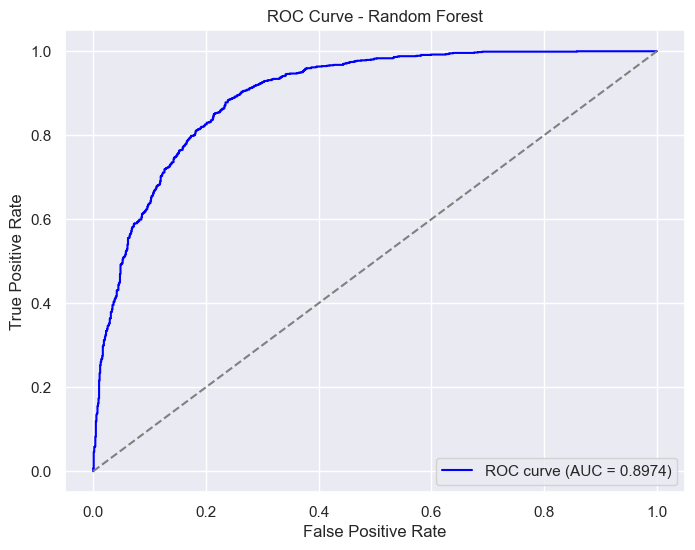

In [47]:
y_probs = rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.4f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()